In [28]:
import numpy as np
import optimisation as opt
import estimation_environment as est
import importlib
importlib.reload(opt)
importlib.reload(est)

<module 'estimation_environment' from '/Users/krzywdaja/Documents/obsedian_test/Brain2/Science/Projects/Estimation-AI/Code/estimation_environment.py'>

## Open AI gym


In [8]:

import numpy as np
# Load the TensorBoard notebook extension
%load_ext tensorboard
import matplotlib.pyplot as plt


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
tcs = [50,100,200,300,500,5000]
om0 = 0
sigma  = 50
initial_std = 10
seed_environment =  1
seed_estimation = 2


def policy_est(state, **kwargs):
    action = kwargs["rng_est"].choice([0,1,2],p=[1/3,1/3,1/3])
    return action

env = est.EstimationEnv(length = 10000, tc = tcs[0], om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)



rng2 = np.random.default_rng(seed_estimation)
res = opt.game(episodes = 10, model=None, env=env, policy = policy_est, rng_est = rng2)

KeyboardInterrupt: 

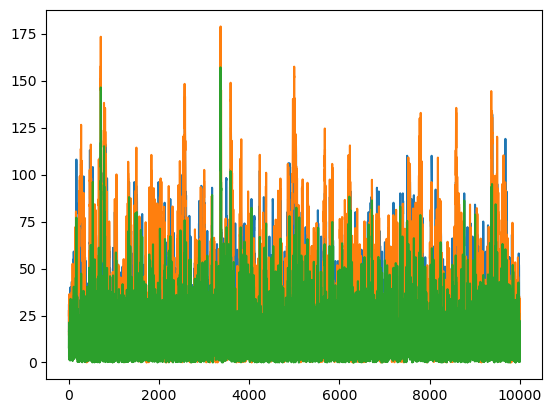

In [57]:
plt.plot(np.abs(np.array(res.mus[0])))
plt.plot(np.abs(np.array(res.oms[0])))
plt.plot(res.get_error()[0])

In [5]:
import gymnasium as gym
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments
logdir = "./ppo_bayes_tensorboard/"

tcs = [50,100,250,500,1000]
seed_environment = 1
for tc in tcs:
    env = est.EstimationEnv(length = 1000, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
    if not os.path.exists("./ppo_bayes_tensorboard/"):
        os.makedirs("./ppo_bayes_tensorboard/")

    model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_bayes_tensorboard/")
    model.learn(total_timesteps=500000, reset_num_timesteps=False, tb_log_name="PPO")
    model.save("ppo_N1e3_check_"+str(tc))

    


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_bayes_tensorboard/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 91       |
| time/              |          |
|    fps             | 1400     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 86.8        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010870403 |
|    clip_fraction        | 0.115       |
|    clip_range      

KeyboardInterrupt: 

In [ ]:
%tensorboard --logdir ppo_bayes_tensorboard --port 6017

Reusing TensorBoard on port 6017 (pid 30880), started 0:00:28 ago. (Use '!kill 30880' to kill it.)

# Plot the reward for N=100

In [21]:
import gymnasium as gym
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env


results = []
for tcn,tc in enumerate(tcs):
    model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_bayes_tensorboard/")
    print(tc)
    model.load("ppo_N1e3_check_"+str(tc))
    env = est.EstimationEnv(length = int(1e3), tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
    results.append(opt.game(episodes = 100, model=model, env=env))

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
50
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
100
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
250
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
500
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
1000


In [22]:
results_sum = [np.sum(results[k].rewards,axis=1) for k in range(5)]

In [34]:
results.append(opt.game(episodes = 2, model=model, env=env))

([<matplotlib.axis.XTick at 0x7fe0e0396440>,
 [Text(1, 0, '50'),
  Text(2, 0, '100'),
  Text(3, 0, '250'),
  Text(4, 0, '500'),
  Text(5, 0, '1000')])

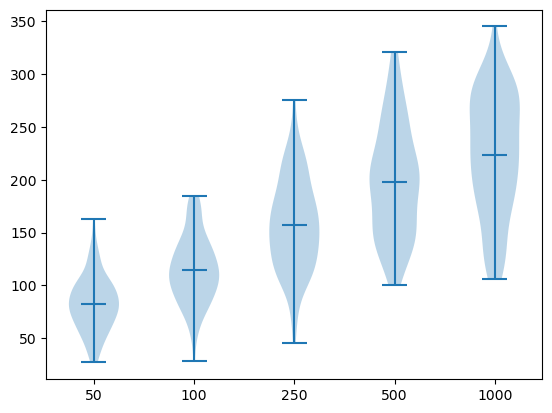

In [14]:

plt.violinplot(np.array(results_sum).T, showmeans=True)
plt.xticks(np.arange(len(tcs))+1, tcs)

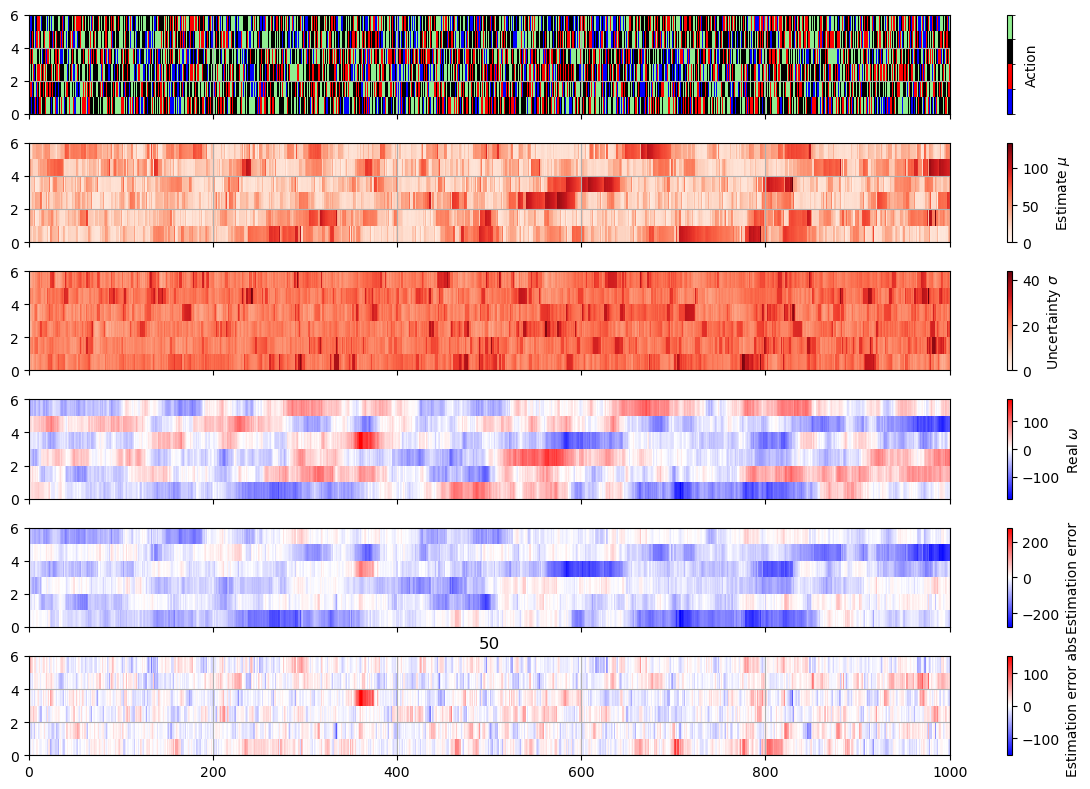

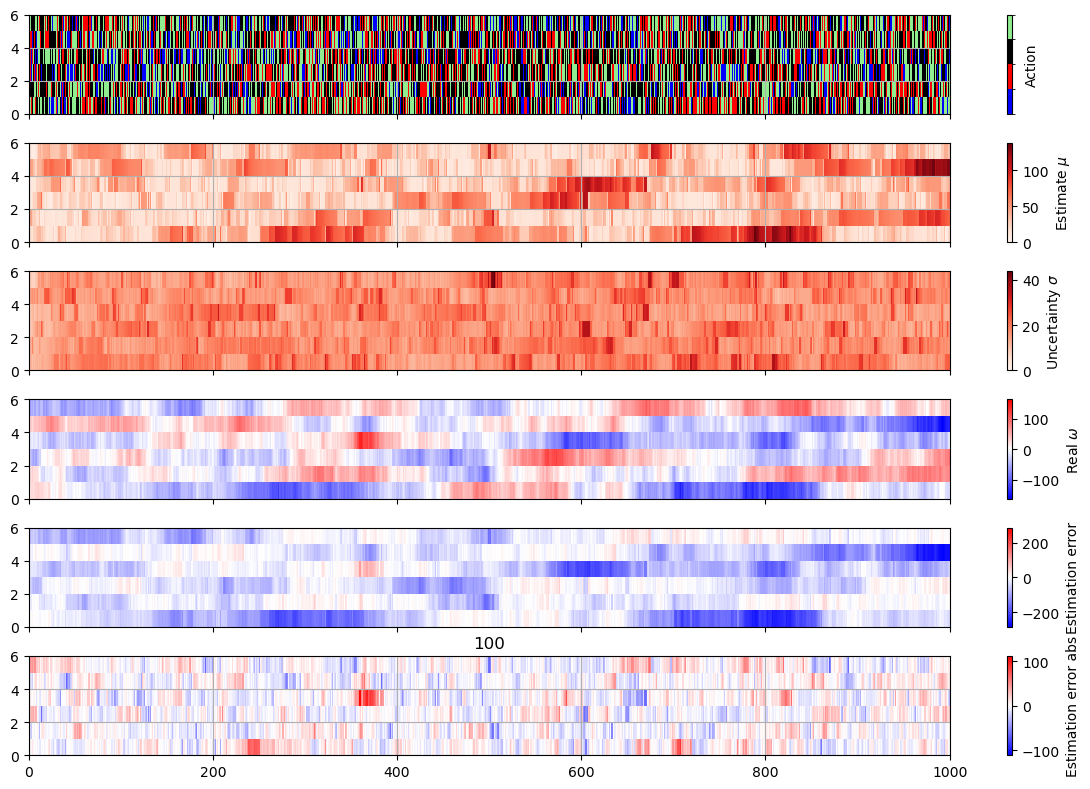

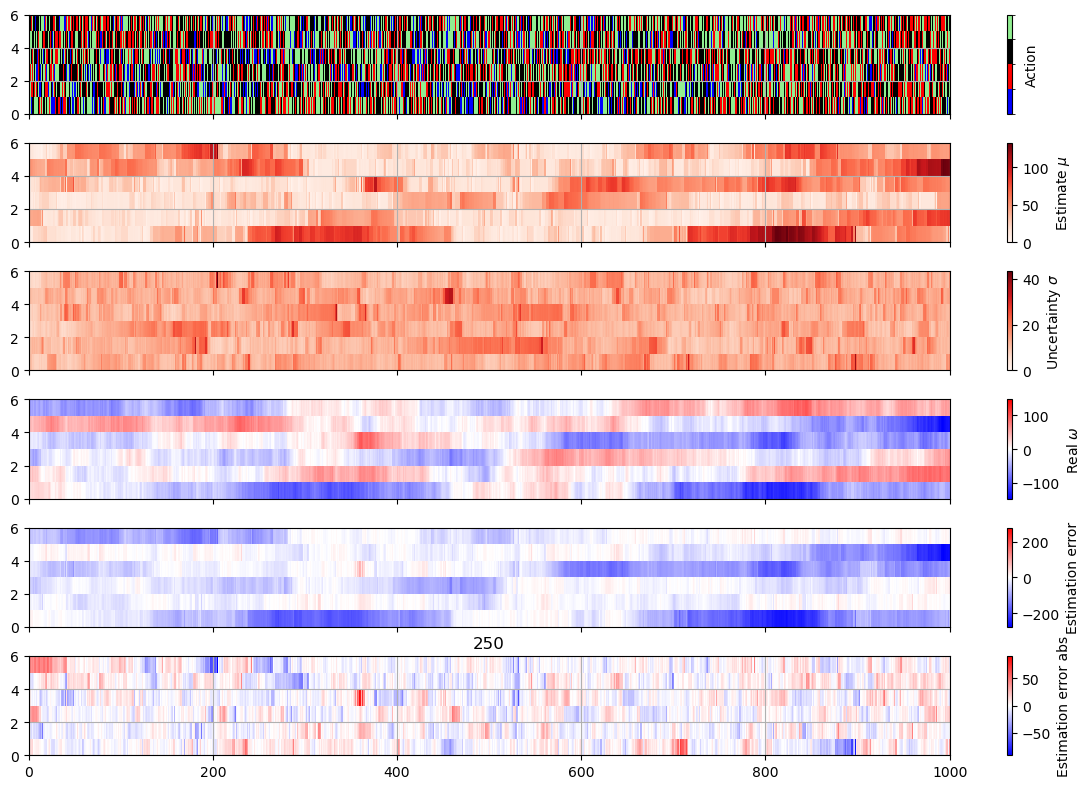

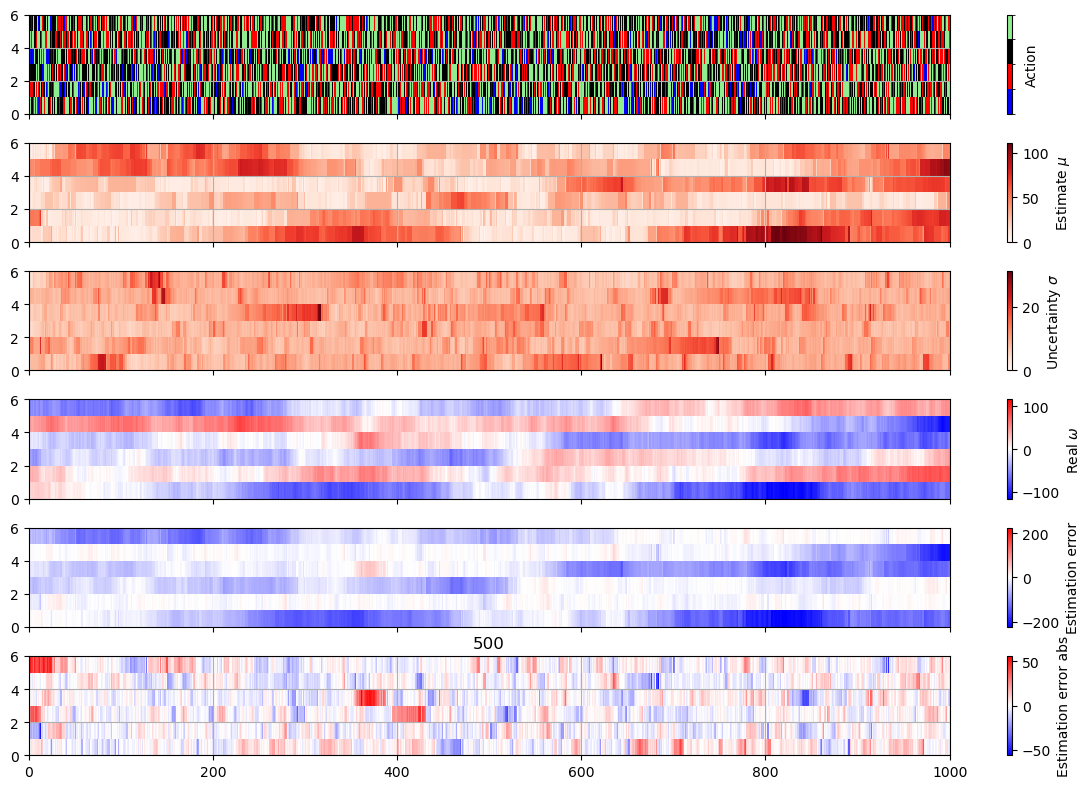

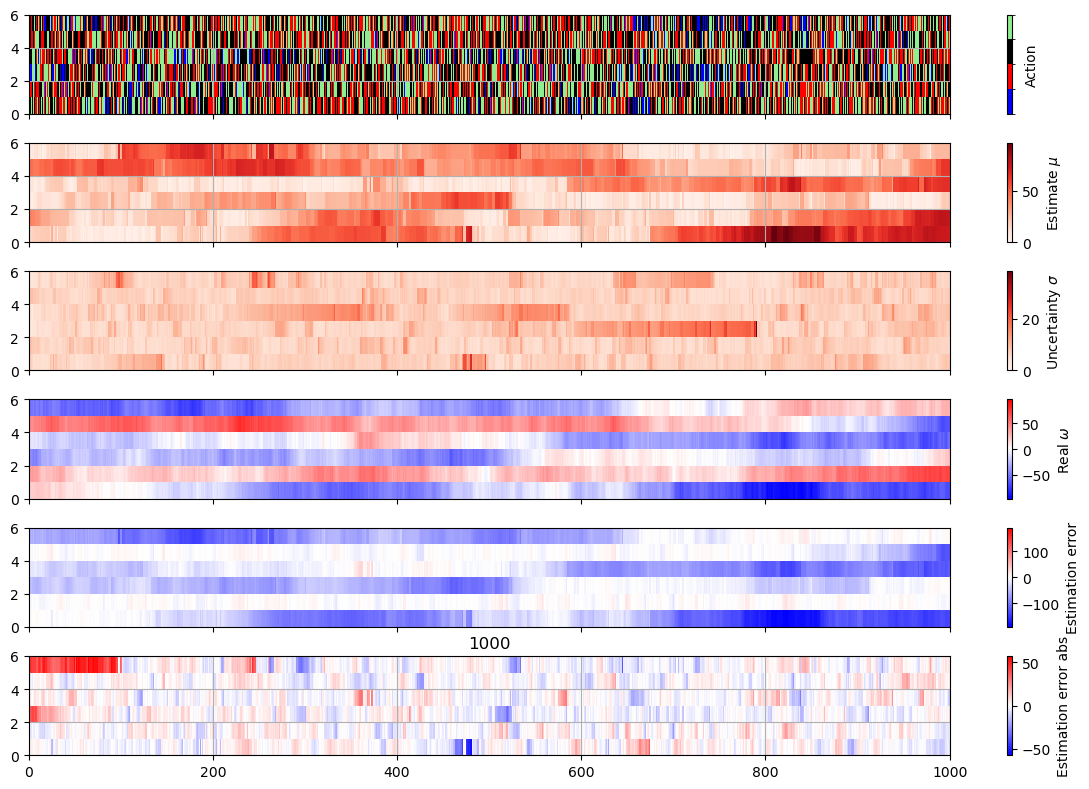

In [26]:


tcsn = 0
for tc in tcs:


    samples = 6
    model.load("ppo_N1e3_check_"+str(tc))
    env = est.EstimationEnv(length = int(1e3), tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                        seed_shot= seed_environment, seed_field = seed_environment)

    results = opt.game(episodes = samples, model=model, env=env)
    
    est.analyse_few_games(results, str(tc))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


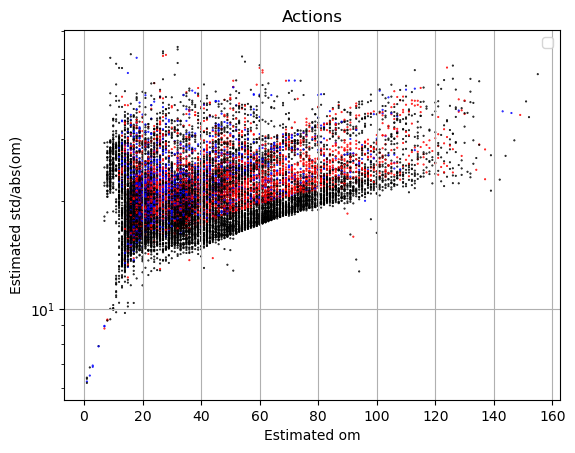

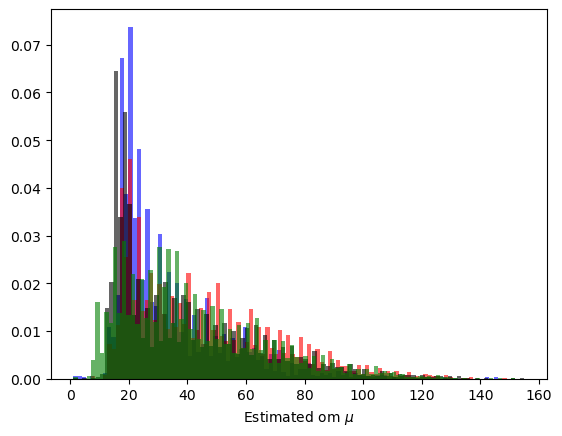

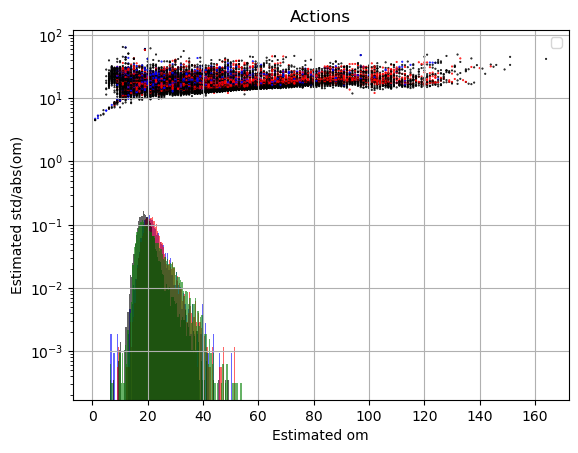

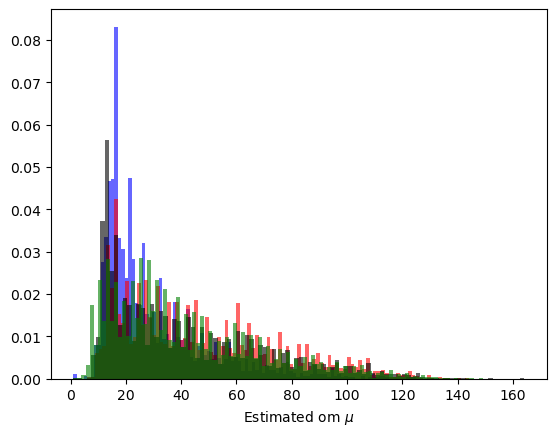

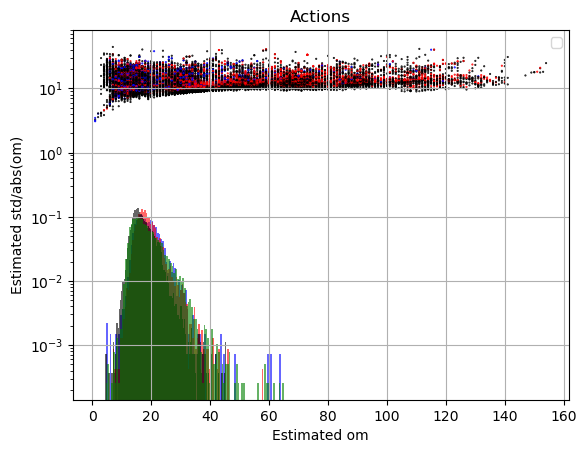

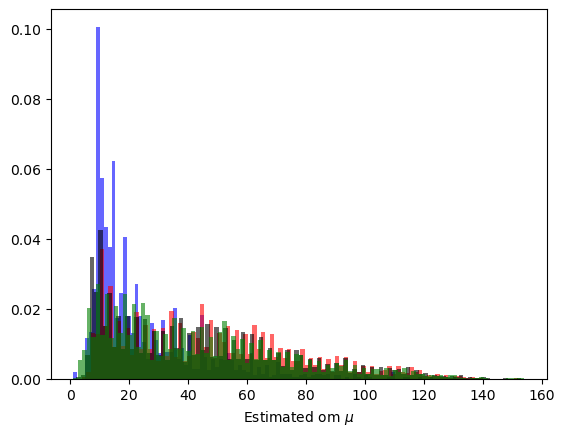

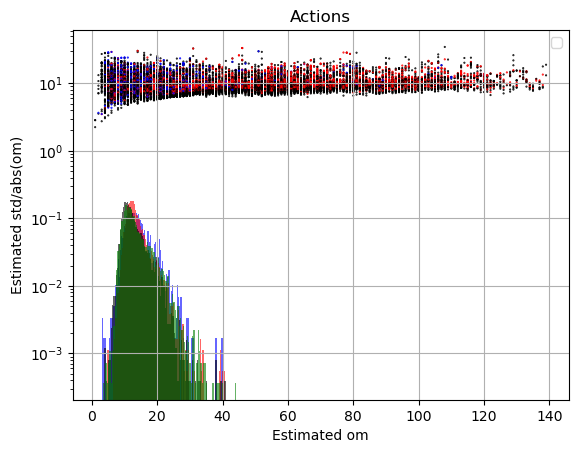

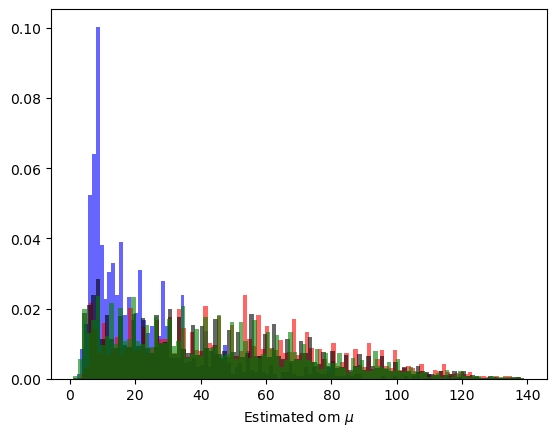

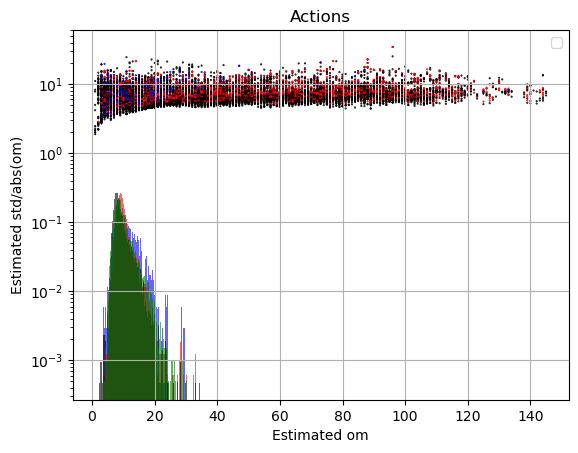

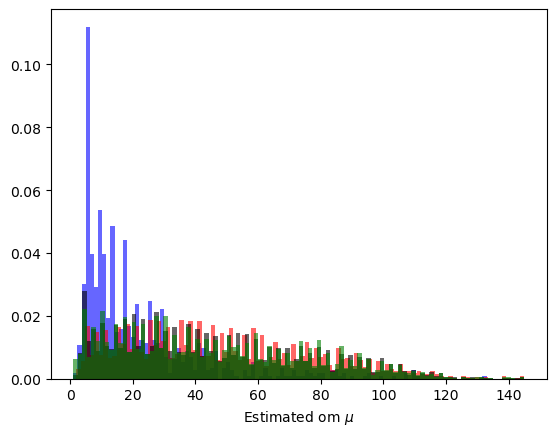

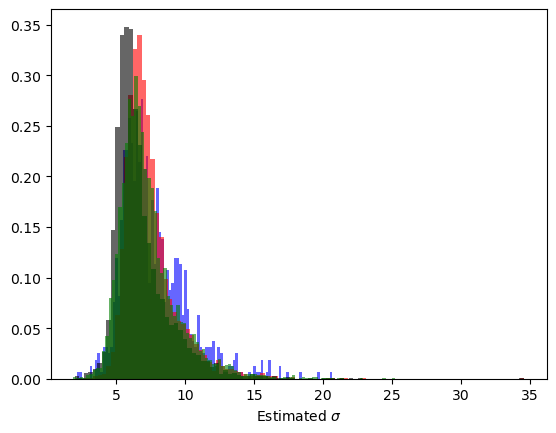

In [30]:
for tc in tcs:


    samples = 20
    model.load("ppo_N1e3_check_"+str(tc))
    env = est.EstimationEnv(length = int(1e3), tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                        seed_shot= seed_environment, seed_field = seed_environment)

    results = opt.game(episodes = samples, model=model, env=env)

    est.analyse_decisions(results, str(tc))



In [307]:
env.tc

50

In [69]:

policies = opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval
bounds = [np.array([[0,1],[0,1],[0,1]]),
            np.array([[0,10],[0,1]]),
            np.array([[0,100],[0,1]]),
            np.array([[0,100],[0,100],[0,100]])]
sigmas = [np.array(0.5), np.array(50.), np.array(50.), np.array(50.)]
means = [np.array([0.7,0.2,0.1]), np.array([5.,0.5]), np.array([50.,0.2]), np.array([50.,10.,2.])]


xs = []
for tc in tcs:
    xs_tc = []
    for pn,policy in enumerate(policies):
            print(bounds[pn])
            print(sigmas[pn])
            print(means[pn])
            env = est.EstimationEnv(length = 1000, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std,
                            seed_field = 1, seed_shot = 1)
            Opt = opt.CMA_optimizer(policy = policies[pn], 
                            generations = 5, 
                            population_size=5, 
                            bounds = bounds[pn], 
                            sigma = sigmas[pn], 
                            mean= means[pn], 
                            episodes = 10,
                            env=env)
            sol = Opt.optimize()
            x_avg, f_avg = Opt.get_representative()
            xs_tc.append(x_avg)
    xs.append(xs_tc)
    

[[0 1]
 [0 1]
 [0 1]]
0.5
[0.7 0.2 0.1]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[ 0 10]
 [ 0  1]]
50.0
[5.  0.5]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[  0 100]
 [  0   1]]
50.0
[50.   0.2]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[  0 100]
 [  0 100]
 [  0 100]]
50.0
[50. 10.  2.]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[0 1]
 [0 1]
 [0 1]]
0.09650431196794214
[0.7 0.2 0.1]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[ 0 10]
 [ 0  1]]
1.9077126553898522
[5.  0.5]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[  0 100]
 [  0   1]]
4.970831011836537
[50.   0.2]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[  0 100]
 [  0 100]
 [  0 100]]
13.23807660864192
[50. 10.  2.]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[0 1]
 [0 1]
 [0 1]]
0.047665241817761335
[0.7 0.2 0.1]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[ 0 10]
 [ 0  1]]
0.43017293273186963
[5.  0.5]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[  0 100]
 [  0   1]]
2.4301809786632993
[50.   0.2]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[  0 100]
 [  0 100]
 [  0 100]]
5.052274245555001
[50. 10.  2.]

In [70]:
#save nested xs list to file
import pickle
with open('xs2.pkl', 'wb') as f:
    pickle.dump(xs, f)


In [15]:
#load nested xs list from file
import pickle
with open('xs.pkl', 'rb') as f:
    xs = pickle.load(f)


In [16]:
xs

[[array([0.73117156, 0.4093704 , 0.02254516]),
  array([6.02575545, 0.51700893]),
  array([55.43331841,  0.70820324]),
  array([46.3830937 , 13.06998139,  3.46838991])],
 [array([0.75365769, 0.24433546, 0.01646223]),
  array([5.81209298, 0.39922085]),
  array([49.21792449,  0.93059551]),
  array([49.83677335,  6.28488514,  0.66992279])],
 [array([0.72633717, 0.17840917, 0.00897916]),
  array([4.94913091, 0.53521408]),
  array([49.40604232,  0.63984954]),
  array([47.68936452,  9.4728695 ,  0.5825536 ])]]

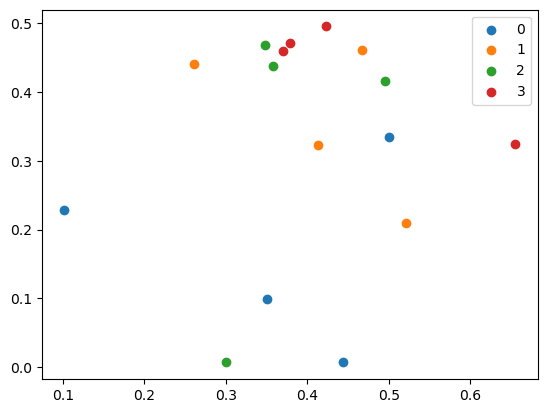

In [350]:
sol[:,:,:3] = sol[:,:,:3]/np.sum(sol[:,:,:3],axis=2)[...,None]
for k in range(4):
    plt.scatter(sol[k,:,0], sol[k,:,1], label = str(k))
plt.legend()

In [71]:
import numpy as np
import optimisation as opt
import estimation_environment as est
import importlib
importlib.reload(opt)
importlib.reload(est)
policies = 7
'''
-always flip
-random
-random with flip p =0.8, est p = 0.15, check p = 0,5
-flip only if std/mu below 0.5
-flip only if mu is above 10
-estimate 5 shots every 30 shots
-agent
'''





#model = model.load("ppo_bayes2")

samples = 50

policies_all = opt.policy_flip, opt.policy_random, opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval

tot_reward = np.zeros((len(tcs),len(policies_all)+1,samples))

for tcn, tc in enumerate(tcs):
    model.load("ppo_N500_"+str(tc))
    
    for pn,policy in enumerate(policies_all):
        
        env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
        if pn>1:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, x = xs[tcn][pn-2], rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
        else:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
    
    env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
    results = opt.game(episodes = samples, model=model, env=env)
    tot_reward[tcn,-1,:] =  np.sum(results.rewards,axis=1)

In [58]:
tcs

[100, 200, 300]

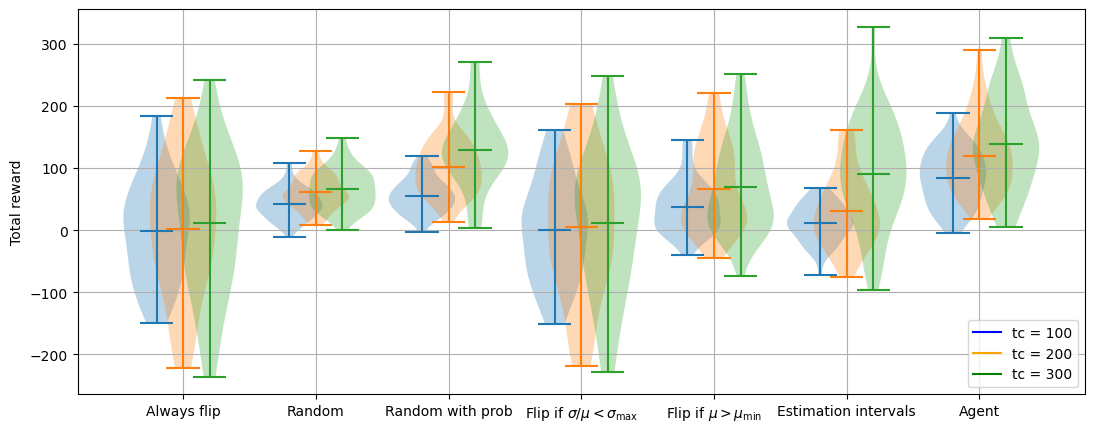

In [66]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8)-.2+tcn*0.2, widths=0.5)
plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                            "Estimation intervals","Agent"])
plt.ylabel("Total reward")
#plt.ylim(-200,550)
plt.grid()
plt.plot([],[],color = "blue", label="tc = 100")
plt.plot([],[],color = "orange", label="tc = 200")
plt.plot([],[],color = "green", label="tc = 300")
plt.legend(loc="lower right")


<Figure size 1300x500 with 0 Axes>

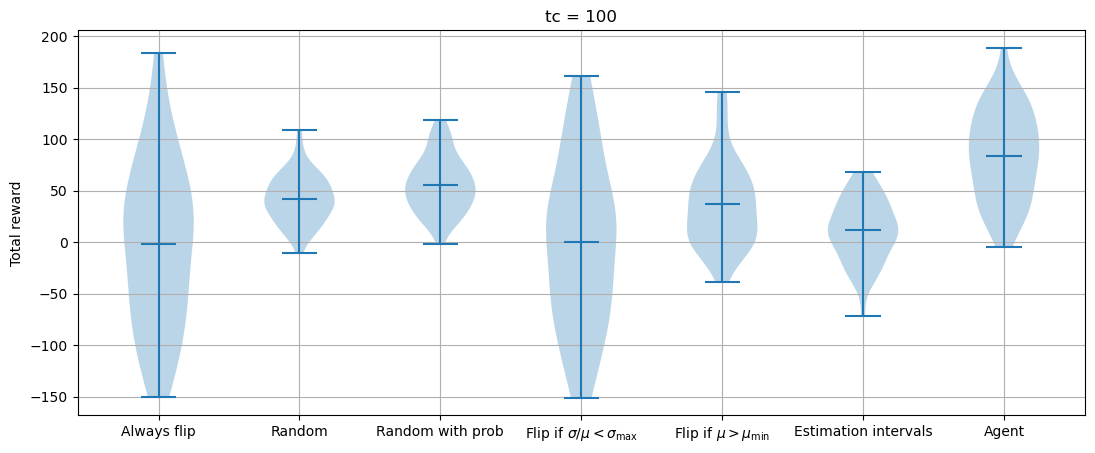

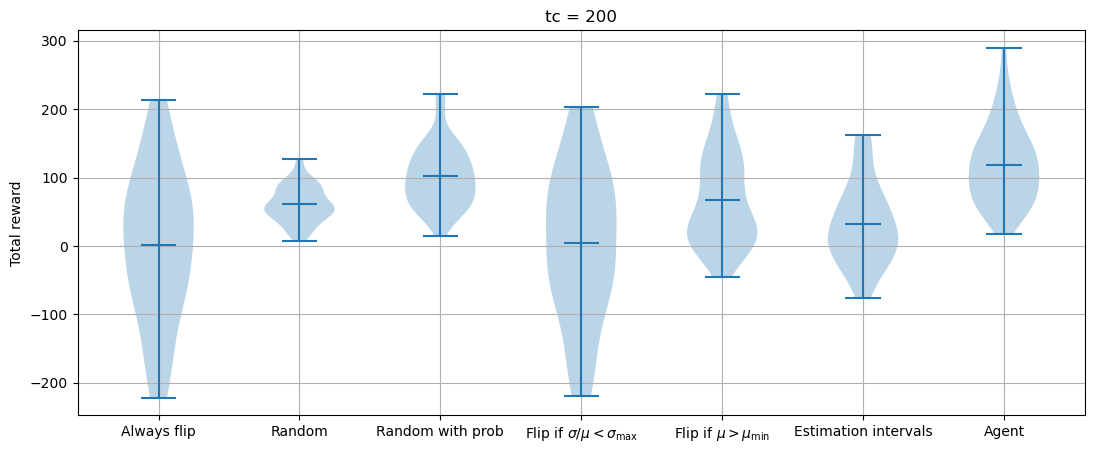

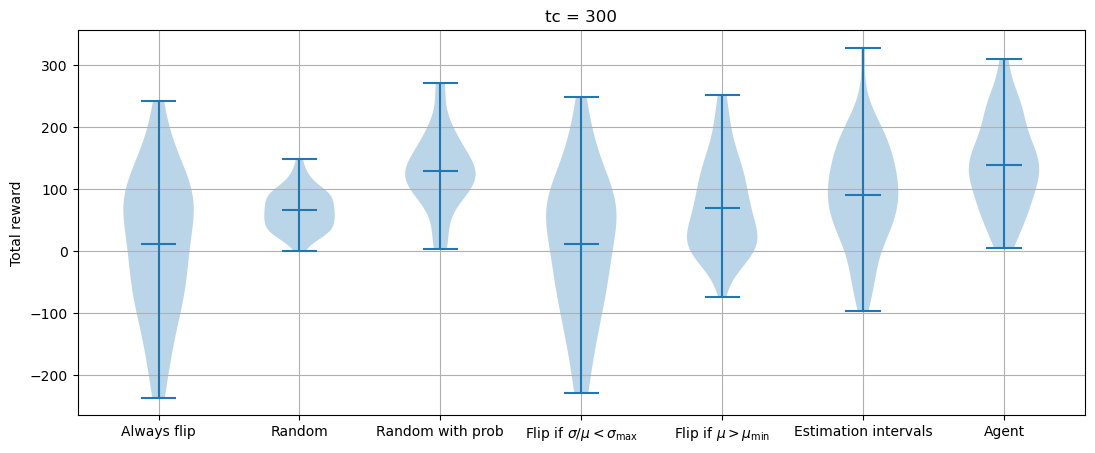

In [68]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.figure(figsize=(13,5))
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8), widths=0.5)
    plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                                "Estimation intervals","Agent"])
    plt.ylabel("Total reward")
    plt.grid()
    plt.title("tc = "+str(tc))
    #plt.ylim(-200,550)
plt.plot([],[],color = "blue", label="tc = 50")
plt.plot([],[],color = "orange", label="tc = 500")
plt.plot([],[],color = "green", label="tc = 5000")
#plt.legend(loc="lower right")